In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('books.csv')

Q1: How many rows and columns are there in books.csv dataset?

In [29]:
rows, columns = df.shape
print(f"A1: The dataset has {rows} rows and {columns} columns.")

A1: The dataset has 399 rows and 24 columns.


Q2: How many books do not have an original title?

In [30]:
books_without_original_title = df['original_title'].isnull().sum()
print(f"A2: There are {books_without_original_title} books without an original title.")

A2: There are 36 books without an original title.


Q3: How many unique books are present in the dataset? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [31]:
df = df.dropna(subset=['original_title'])
unique_books = df['book_id'].nunique()
print(f"A3: There are {unique_books} unique books in the dataset after removing null values in the 'original_title' column.")

A3: There are 363 unique books in the dataset after removing null values in the 'original_title' column.


Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?

In [32]:
average_rating = df['average_rating'].mean()
print(f"A4: The average rating of all the books is {average_rating:.2f}.")

A4: The average rating of all the books is 3.99.


Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [33]:
books_published_in_2000 = df[df['original_publication_year'] == 2000].shape[0]
print(f"A5: The number of books published in the year 2000 is {books_published_in_2000}.")

A5: The number of books published in the year 2000 is 7.


Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [34]:
max_ratings_book_title = df.loc[df['work_ratings_count'].idxmax(), 'title']
print(f"A6: The book with the maximum number of ratings is '{max_ratings_book_title}'.")

A6: The book with the maximum number of ratings is 'The Diary of a Young Girl'.


Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding. Plot bar graph.

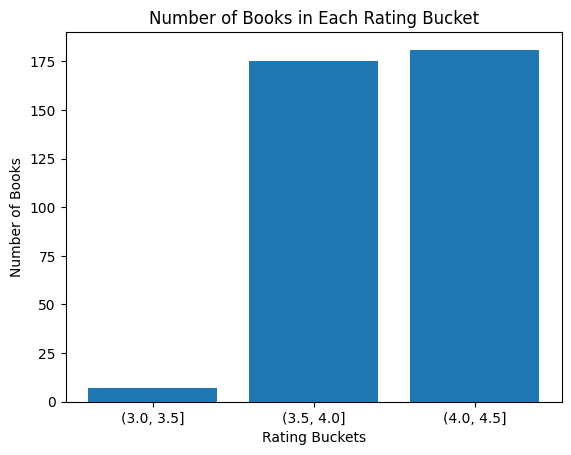

Rating Bucket (3.0, 3.5]: 7 books
Rating Bucket (3.5, 4.0]: 175 books
Rating Bucket (4.0, 4.5]: 181 books


In [37]:
rating_buckets = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
df['rating_bucket'] = pd.cut(df['average_rating'], bins=rating_buckets, include_lowest=True)
df['rating_bucket'] = df['rating_bucket'].astype(str)
rating_counts = df['rating_bucket'].value_counts().sort_index()

# Plotting the bar graph
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating Buckets')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Rating Bucket')
plt.show()

for bucket, count in zip(rating_counts.index, rating_counts.values):
    print(f"Rating Bucket {bucket}: {count} books")